###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

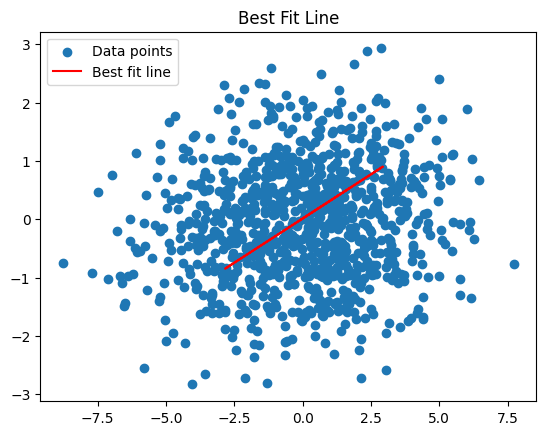

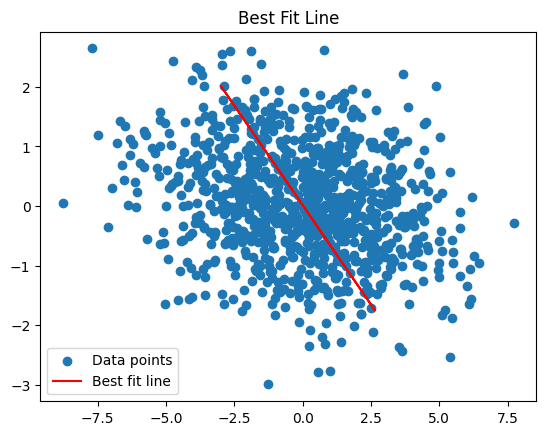

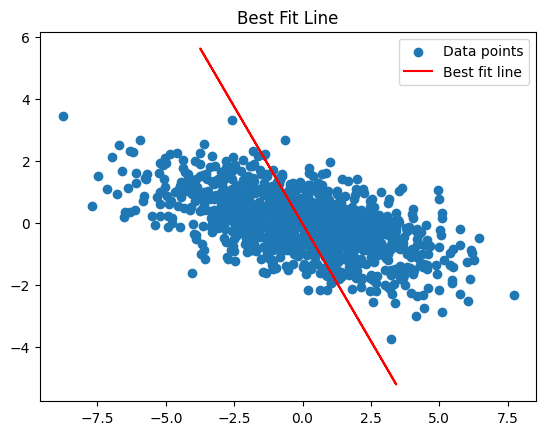

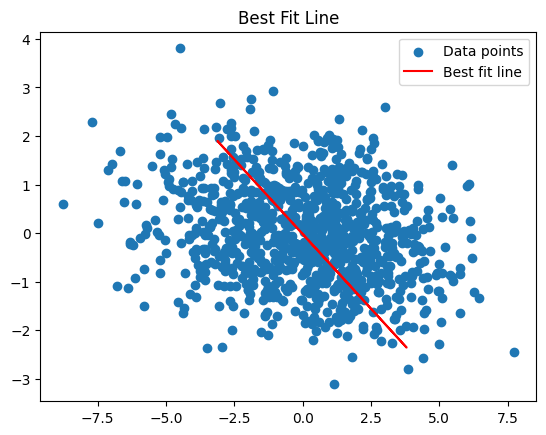

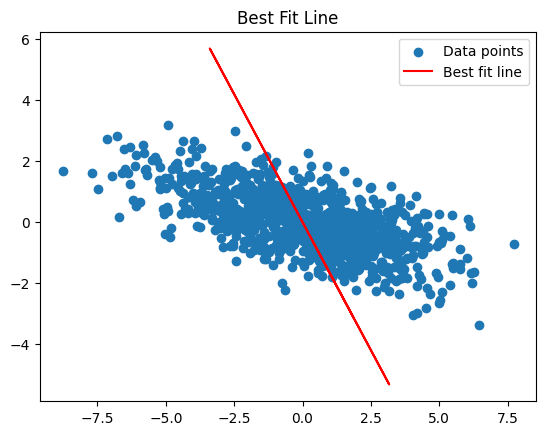

In [61]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
n_samples=1000
n_features=5
X=np.random.randn(n_samples,n_features)
coeff=np.random.randn(n_features)
bias=np.random.randn(n_samples)
Y=np.dot(X,coeff)+bias
for i in range (0,5):
    x=X[:,i]
    x=x.reshape(-1,1)
    c_column=[1]*1000
    column_to_add = np.array(c_column)
    column_to_add=column_to_add.reshape(-1,1)
    x_cap=np.concatenate((x, column_to_add), axis=1)
    Y=Y.reshape(-1,1)
    coefficients = np.linalg.inv(x_cap.T.dot(x_cap)).dot(x_cap.T).dot(Y)
    m=coefficients[0][0]
    c=coefficients[1][0]
    plt.scatter(Y, x, label='Data points')
    plt.plot(x, m * x + c, color='red', label='Best fit line')
    plt.title('Best Fit Line')
    plt.legend()
    plt.show()

### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

[0. 1. 2. 3.]


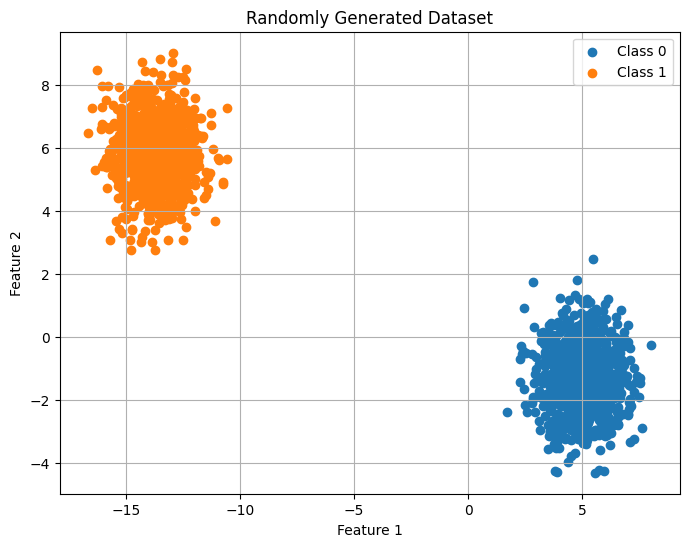

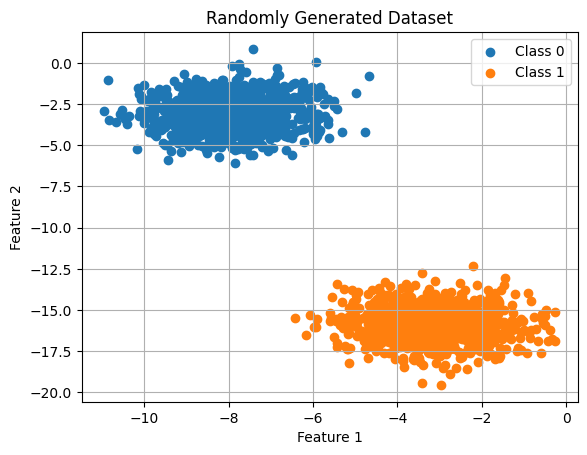

In [112]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

# Parameters
n_samples = 1000
n_features = 2 
n_classes = 2    # Number of classes
n_clusters_per_class = 2  # Number of clusters per class
cluster_std = 1.0  # Standard deviation of clusters

# Generate data for two classes with two clusters per class
X = np.zeros((n_samples * n_clusters_per_class * n_classes, n_features))
y = np.zeros(n_samples * n_clusters_per_class * n_classes)
index=0
for i in range(n_classes):
    for j in range(n_clusters_per_class):
        # Generate random centers for each cluster
        center = np.random.randn(n_features) * 10  # Random center for the cluster
        idx_start = (i * n_clusters_per_class + j) * n_samples
        idx_end = idx_start + n_samples
        
        # Generate data for each cluster
        X_cluster = np.random.normal(loc=center, scale=cluster_std, size=(n_samples, n_features))
        X[idx_start:idx_end] = X_cluster
        y[idx_start:idx_end] = index
        index+=1

# Plot Data
plt.figure(figsize=(8, 6))
print(np.unique(y))
# Plot points for each class
for class_label in np.unique(y):
    if class_label%2==0:
          
          plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f'Class {int(class_label/2)}')

plt.title('Randomly Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

for class_label in np.unique(y):
    if class_label%2!=0:
          plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f'Class {int(class_label/2)}')

plt.title('Randomly Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

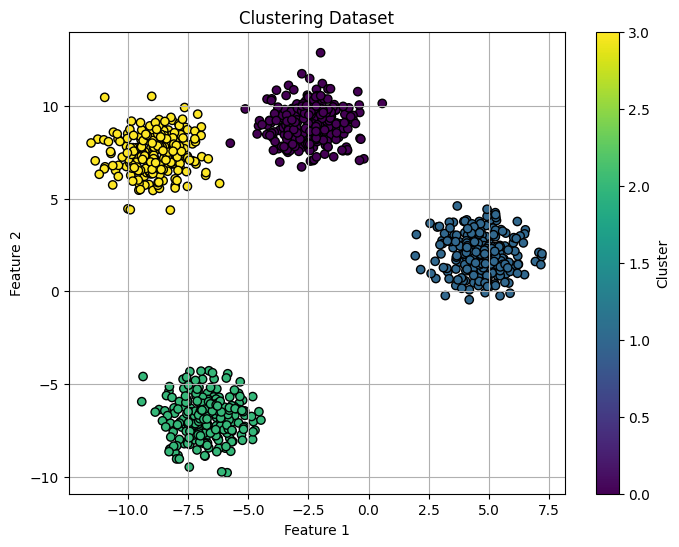

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Number of features
n_features = 2

# Number of clusters
n_clusters = 4

# Generate dataset
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('Clustering Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [113]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Send a GET request to the website
url = 'https://www.worldometers.info/coronavirus/'
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing COVID-19 data
table = soup.find('table', {'id': 'main_table_countries_today'})

# Extract column headers from the table
headers = [header.text.strip() for header in table.find_all('th')]

# Extract rows from the table
rows = []
for row in table.find_all('tr'):
    row_data = [data.text.strip() for data in row.find_all('td')]
    if row_data:
        rows.append(row_data)

# Create a Pandas dataframe
df = pd.DataFrame(rows, columns=headers)

# Remove any rows with empty data or headers
df = df[df['Country,Other'].notna()]

# Rename columns as per the specified names
df = df.rename(columns={
    'Country,Other': 'Country',
    'TotalCases': 'Total Cases',
    'NewCases': 'New Cases',
    'TotalDeaths': 'Total Deaths',
    'NewDeaths': 'New Deaths',
    'TotalRecovered': 'Total Recovered',
    'NewRecovered': 'New Recovered',
    'ActiveCases': 'Active Cases'
})

# Display the dataframe
print(df)


    #         Country  Total Cases New Cases Total Deaths New Deaths  \
0       North America  131,889,132              1,695,941              
1                Asia  221,500,265              1,553,662              
2              Europe  253,406,198              2,101,824              
3       South America   70,200,879              1,367,332              
4             Oceania   14,895,771                 33,015              
..  ..            ...          ...       ...          ...        ...   
242            Total:   70,200,879              1,367,332              
243            Total:   14,895,771                 33,015              
244            Total:   12,860,924                258,892              
245            Total:          721                     15              
246            Total:  704,753,890         0    7,010,681          0   

    Total Recovered New Recovered Active Cases Serious,Critical  ...  \
0       127,665,129          +350    2,528,062            6,095

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

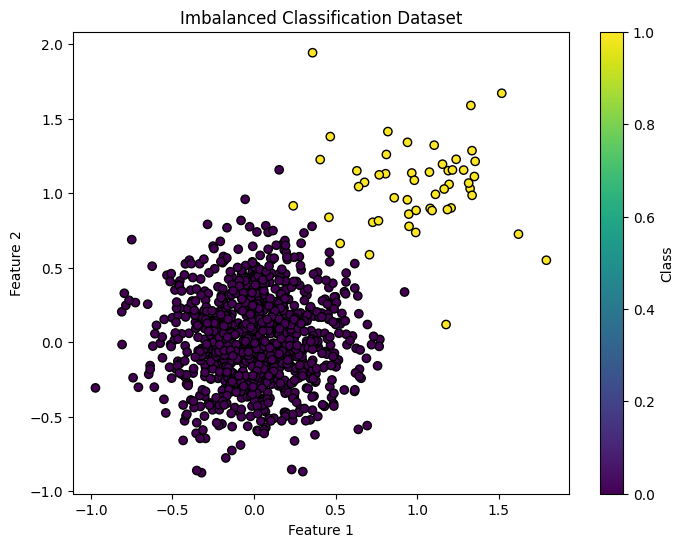

Original class distribution: Counter({0: 950, 1: 50})


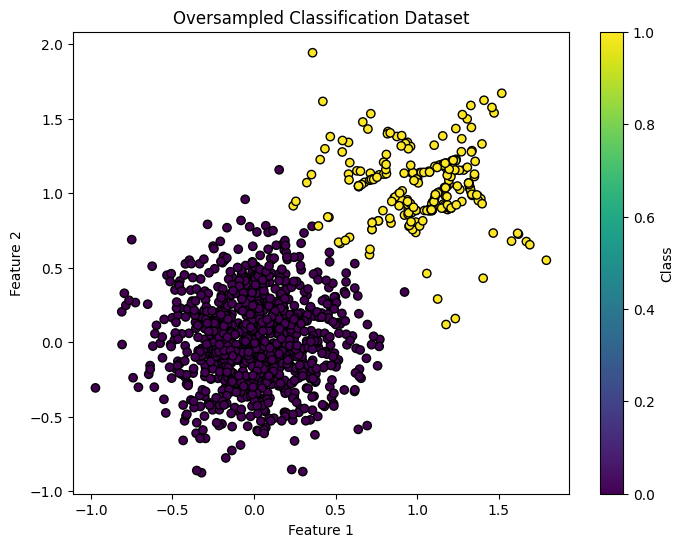

Class distribution after oversampling: Counter({0: 950, 1: 250})


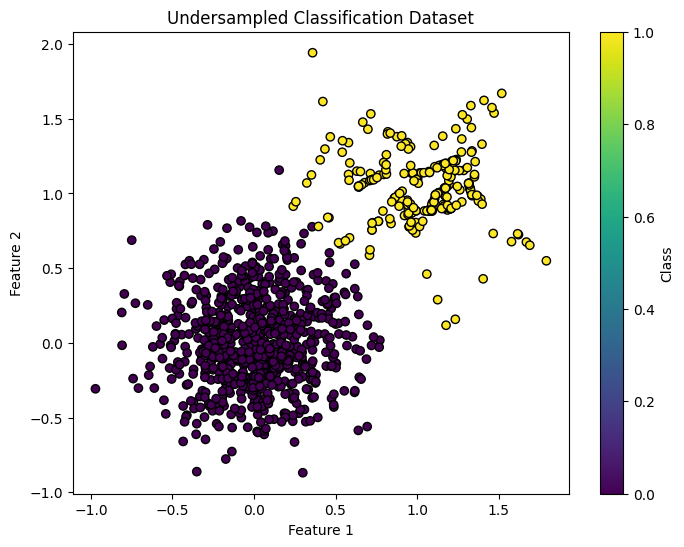

Class distribution after undersampling: Counter({0: 750, 1: 250})


In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Generate imbalanced classification dataset
X, y = make_blobs(n_samples=[950, 50], centers=[[0, 0], [1, 1]], cluster_std=0.3, random_state=42)

# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('Imbalanced Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

# Check class distribution using Counter
print('Original class distribution:', Counter(y))

# Oversample minority class using SMOTE
oversampler = SMOTE(sampling_strategy={1: 250})  # 5 times the initial size of the minority class
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Plot the oversampled data
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='viridis', marker='o', edgecolors='k')
plt.title('Oversampled Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

# Check class distribution after oversampling
print('Class distribution after oversampling:', Counter(y_resampled))

# Undersample majority class using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy={0: 750})  # 3 times the size of the minority class
X_undersampled, y_undersampled = undersampler.fit_resample(X_resampled, y_resampled)

# Plot the undersampled data
plt.figure(figsize=(8, 6))
plt.scatter(X_undersampled[:, 0], X_undersampled[:, 1], c=y_undersampled, cmap='viridis', marker='o', edgecolors='k')
plt.title('Undersampled Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

# Check class distribution after undersampling
print('Class distribution after undersampling:', Counter(y_undersampled))


##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [111]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data  # Feature data
y = iris_data.target  # Target data

# Create a pandas DataFrame
df = pd.DataFrame(data=X, columns=iris_data.feature_names)
df['target'] = y  # Add target column
print("First 5 rows of the DataFrame:")
print(df.head())

# Check for missing values
print("Missing values in DataFrame:")
print(df.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print dimensions of the training and testing sets
print("Dimensions of training set:", X_train.shape)
print("Dimensions of testing set:", X_test.shape)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the first 5 rows of the standardized training set
print("First 5 rows of standardized training set:")
print(pd.DataFrame(X_train_scaled, columns=iris_data.feature_names).head())


First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Missing values in DataFrame:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Dimensions of training set: (105, 4)
Dimensions of testing set: (45, 4)
First 5 rows of standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.32339